# EDA on the training data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")
%matplotlib inline
%run -i ./Data_Processing/feature_info.py

In [2]:
training_data = pd.read_csv('./Datasets/training_data_full.csv')

# Distribution of the target variable

In [3]:
training_data.head(3)

,StateAbbr,StateDesc,CityName,CountyFIPS,TractFIPS,BPMED_2017,Unemployment_trend,Unemployment_rate_2017,BPMED_trend,CHOLSCREEN_2017,...,BPHIGH_trend,STROKE_2017,STROKE_trend,KIDNEY_2017,KIDNEY_trend,MHLTH_2017,MHLTH_trend,COPD_2017,COPD_trend,diabetes_change_rate_2020
0,AL,Alabama,Birmingham,1073,1073000100,77.8,-0.22807,4.4,-0.027500,78.6,...,0.032468,5.5,-0.017857,4.3,0.023810,20.5,0.102151,11.3,0.036697,0.097701
1,AL,Alabama,Birmingham,1073,1073000300,78.5,-0.22807,4.4,-0.022416,76.0,...,0.057018,6.1,0.033898,4.6,0.069767,21.2,0.152174,11.9,0.101852,0.101010
2,AL,Alabama,Birmingham,1073,1073000400,79.4,-0.22807,4.4,-0.031707,80.2,...,-0.019960,5.6,-0.017544,4.2,0.000000,18.8,0.074286,10.5,0.019417,0.027174


In [9]:
np.mean(100 * training_data['diabetes_change_rate_2020'])

1.3889859594419893

#### Seems like a pretty big spread of the target variable. A lot of tracts stayed around the same, whiel some changed pretty dramatically

Text(0.5, 1.0, 'Diabetes-Prevalence Proportion Increase 2017-2020')

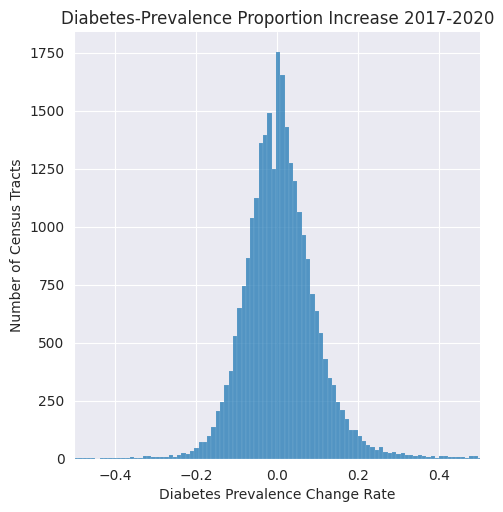

In [26]:
sns.displot(training_data['diabetes_change_rate_2020'], bins=500)
plt.xlim([-0.5,0.5])
plt.xlabel('Diabetes Prevalence Change Rate')
plt.ylabel('Number of Census Tracts')
plt.title('Diabetes-Prevalence Proportion Increase 2017-2020')

# Check for collinearities in the numerical features

### Makes sense that a lot of the features related to cardiovascular health are pretty highly correlated.
### Such as Diabetes with COPD ( Chronic obstructure pulmonary disease) as well as Stroke incidence

In [5]:
non_numerical_features = set([
    'StateAbbr',
    'StateDesc',
    'CityName',
    'CountyFIPS',
    'TractFIPS'
])

target_features = set([
    'diabetes_change_rate_2020'
])

numerical_features = set(training_data.columns) - non_numerical_features - target_features
numerical_features

{'ACCESS2_2017',
 'ACCESS2_trend',
 'ARTHRITIS_2017',
 'ARTHRITIS_trend',
 'BINGE_2017',
 'BINGE_trend',
 'BPHIGH_2017',
 'BPHIGH_trend',
 'BPMED_2017',
 'BPMED_trend',
 'CANCER_2017',
 'CANCER_trend',
 'CASTHMA_2017',
 'CASTHMA_trend',
 'CHD_2017',
 'CHD_trend',
 'CHECKUP_2017',
 'CHECKUP_trend',
 'CHOLSCREEN_2017',
 'CHOLSCREEN_trend',
 'COPD_2017',
 'COPD_trend',
 'CSMOKING_2017',
 'CSMOKING_trend',
 'DIABETES_2017',
 'DIABETES_trend',
 'HIGHCHOL_2017',
 'HIGHCHOL_trend',
 'KIDNEY_2017',
 'KIDNEY_trend',
 'LPA_2017',
 'LPA_trend',
 'MHLTH_2017',
 'MHLTH_trend',
 'OBESITY_2017',
 'OBESITY_trend',
 'PHLTH_2017',
 'PHLTH_trend',
 'STROKE_2017',
 'STROKE_trend',
 'Unemployment_rate_2017',
 'Unemployment_trend'}

/tmp/ipykernel_292/3164012346.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_map = training_data[numerical_features].corr()


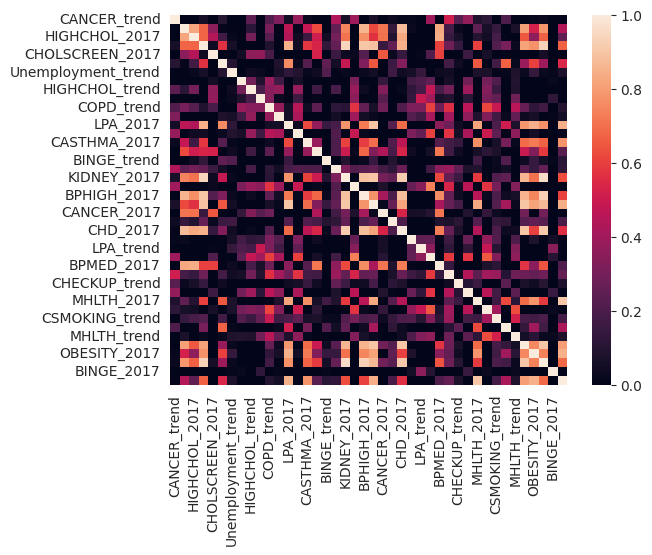

In [6]:
corr_map = training_data[numerical_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);

## The Cardiovascular features are pretty strongly correlated with each other:

During modeling these should be combined into 1 or 2 columns

In [7]:
cardiovascular_features = [
    'COPD_2017', # Chronic obstructure pulmonary disease
    'STROKE_2017', # Stroke incidence
    'LPA_2017', # Low Physical Activity
    'BPHIGH_2017', # High BP Incidence
    'KIDNEY_2017' # Chronic kidney disease
]

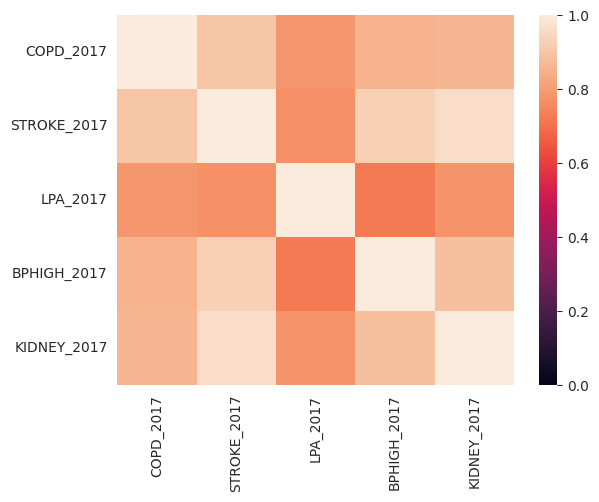

In [8]:
corr_map = training_data[cardiovascular_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);

In [25]:
training_data[['OBESITY_2017', 'OBESITY_trend','DIABETES_2017', 'DIABETES_trend']]

,OBESITY_2017,OBESITY_trend,DIABETES_2017,DIABETES_trend
0,46.4,-0.019027,17.4,-0.049180
1,47.8,0.006316,19.8,0.005076
2,45.7,-0.031780,18.4,-0.061224
3,48.0,-0.030303,22.4,-0.062762
4,52.7,-0.013109,25.0,-0.042146
...,...,...,...,...
27114,28.9,0.010490,8.1,0.025316
27115,25.6,0.015873,8.8,0.011494
27116,27.7,-0.003597,7.4,0.000000
27117,30.9,-0.040373,9.4,-0.078431


In [21]:
training_data

,StateAbbr,StateDesc,CityName,CountyFIPS,TractFIPS,BPMED_2017,Unemployment_trend,Unemployment_rate_2017,BPMED_trend,CHOLSCREEN_2017,...,BPHIGH_trend,STROKE_2017,STROKE_trend,KIDNEY_2017,KIDNEY_trend,MHLTH_2017,MHLTH_trend,COPD_2017,COPD_trend,diabetes_change_rate_2020
0,AL,Alabama,Birmingham,1073,1073000100,77.8,-0.228070,4.4,-0.027500,78.6,...,0.032468,5.5,-0.017857,4.3,0.023810,20.5,0.102151,11.3,0.036697,0.097701
1,AL,Alabama,Birmingham,1073,1073000300,78.5,-0.228070,4.4,-0.022416,76.0,...,0.057018,6.1,0.033898,4.6,0.069767,21.2,0.152174,11.9,0.101852,0.101010
2,AL,Alabama,Birmingham,1073,1073000400,79.4,-0.228070,4.4,-0.031707,80.2,...,-0.019960,5.6,-0.017544,4.2,0.000000,18.8,0.074286,10.5,0.019417,0.027174
3,AL,Alabama,Birmingham,1073,1073000500,82.1,-0.228070,4.4,-0.022619,80.5,...,-0.003683,7.3,-0.051948,5.3,0.019231,19.4,0.065934,12.3,0.008197,0.058036
4,AL,Alabama,Birmingham,1073,1073000700,81.8,-0.228070,4.4,-0.018007,77.4,...,0.019856,9.0,-0.052632,6.4,0.032258,23.1,0.094787,14.8,0.027778,-0.012000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27114,WY,Wyoming,Cheyenne,56021,56021001401,70.7,-0.095238,3.8,-0.027510,76.0,...,0.043165,2.5,0.041667,2.5,0.086957,11.3,0.000000,5.8,0.000000,-0.037037
27115,WY,Wyoming,Cheyenne,56021,56021001402,76.9,-0.095238,3.8,-0.021628,78.6,...,0.000000,3.3,0.031250,3.1,0.068966,9.8,0.000000,6.2,0.016393,0.068182
27116,WY,Wyoming,Cheyenne,56021,56021001501,69.9,-0.095238,3.8,-0.033195,76.5,...,0.010909,2.3,0.045455,2.3,0.045455,10.7,-0.018349,5.3,0.000000,0.040541
27117,WY,Wyoming,Cheyenne,56021,56021001502,72.9,-0.095238,3.8,-0.026702,74.5,...,-0.012384,3.2,-0.085714,3.0,-0.032258,12.5,-0.087591,7.0,-0.125000,-0.053191
